In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing the blanks with 0 as tenure is 0 and no total charges are recorder

In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
df.isnull().sum().sum()

np.int64(0)

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [27]:
df["customerID"].duplicated().sum()

np.int64(0)

In [28]:
 def conv(value):
     if value == 1:
         return "yes"
     else:
         return "no"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

### '--> converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

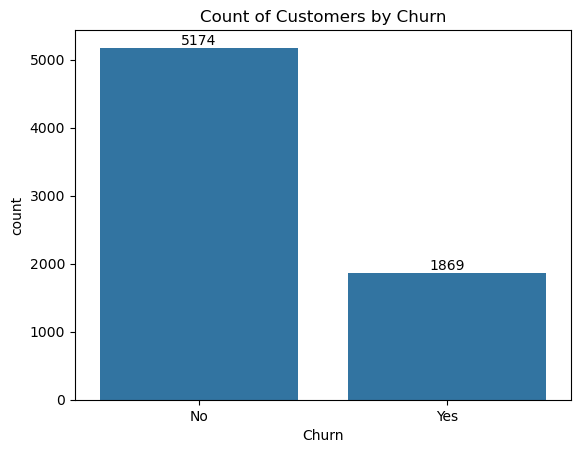

In [48]:
ax = sns.countplot(x = 'Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

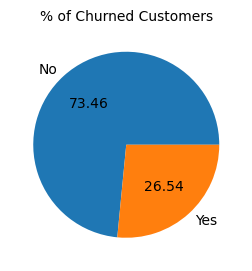

In [52]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn': "count"})

plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f")
plt.title("% of Churned Customers", fontsize = 10)
plt.show()

### '--> from the given pie chart we can conclude that 26.54% of our customers are chunred out.
### --> now lets explore the reason behind it

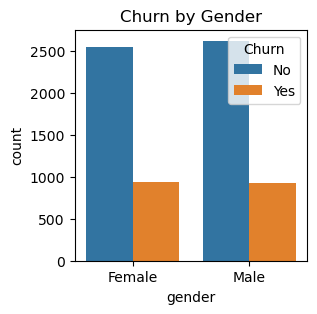

In [67]:
plt.figure(figsize = (3,3))

sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

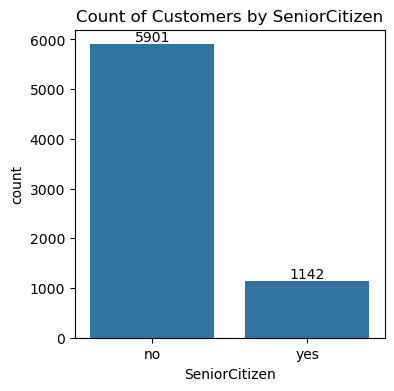

In [77]:
plt.figure(figsize = (4,4)) 
ax = sns.countplot(x = 'SeniorCitizen', data = df) 
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by SeniorCitizen') 
plt.show()

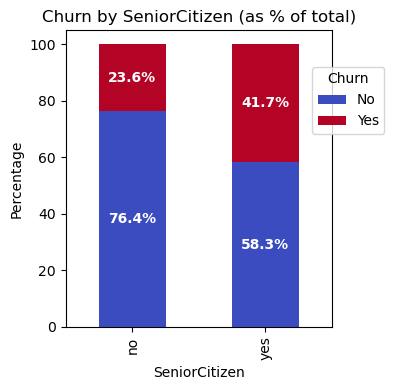

In [78]:
# Compute percentage distribution
data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Calculate % of total within each SeniorCitizen group (FIXED)
data['Percent'] = data.groupby('SeniorCitizen')['Count'].transform(lambda x: 100 * x / x.sum())

# Pivot for stacked bar plot
pivot_df = data.pivot(index='SeniorCitizen', columns='Churn', values='Percent')

# Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(4,4),
    colormap='coolwarm',
)

# Add % labels on each stacked segment
for i, (idx, row) in enumerate(pivot_df.iterrows()):
    cum_sum = 0
    for churn, value in row.items():
        plt.text(
            i, cum_sum + value/2,
            f"{value:.1f}%",
            ha='center', va='center', color='white', fontsize=10, fontweight='bold'
        )
        cum_sum += value

# Title and labels
plt.title('Churn by SeniorCitizen (as % of total)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.legend(title='Churn', bbox_to_anchor = (0.9, 0.9))
plt.tight_layout()
plt.show()

### --> comparatively a greater number of senior citizen category have churned

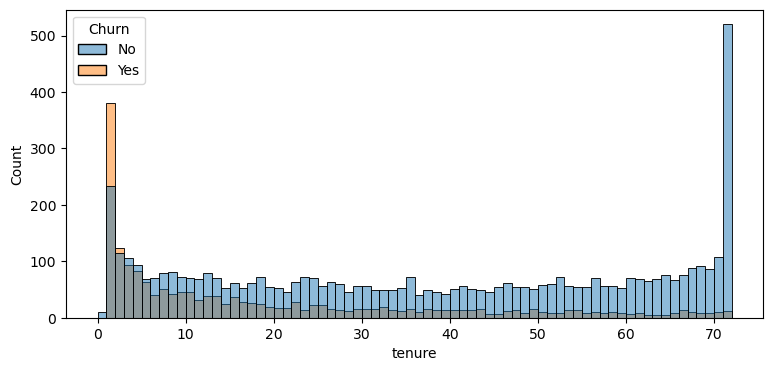

In [89]:
plt.figure(figsize = (9,4)) 
sns.histplot(x = "tenure", data = df, bins = 72, hue = 'Churn')
plt.show()

### '--> people who have used our servies for long time have stayed, people who have used our services for 1 or 2 months have churned out

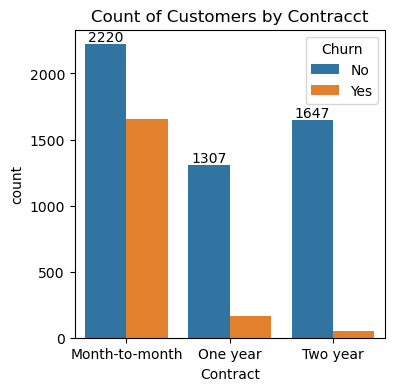

In [92]:
plt.figure(figsize = (4,4)) 
ax = sns.countplot(x = 'Contract', data = df, hue = "Churn") 
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contracct') 
plt.show()

### '--> people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

In [93]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

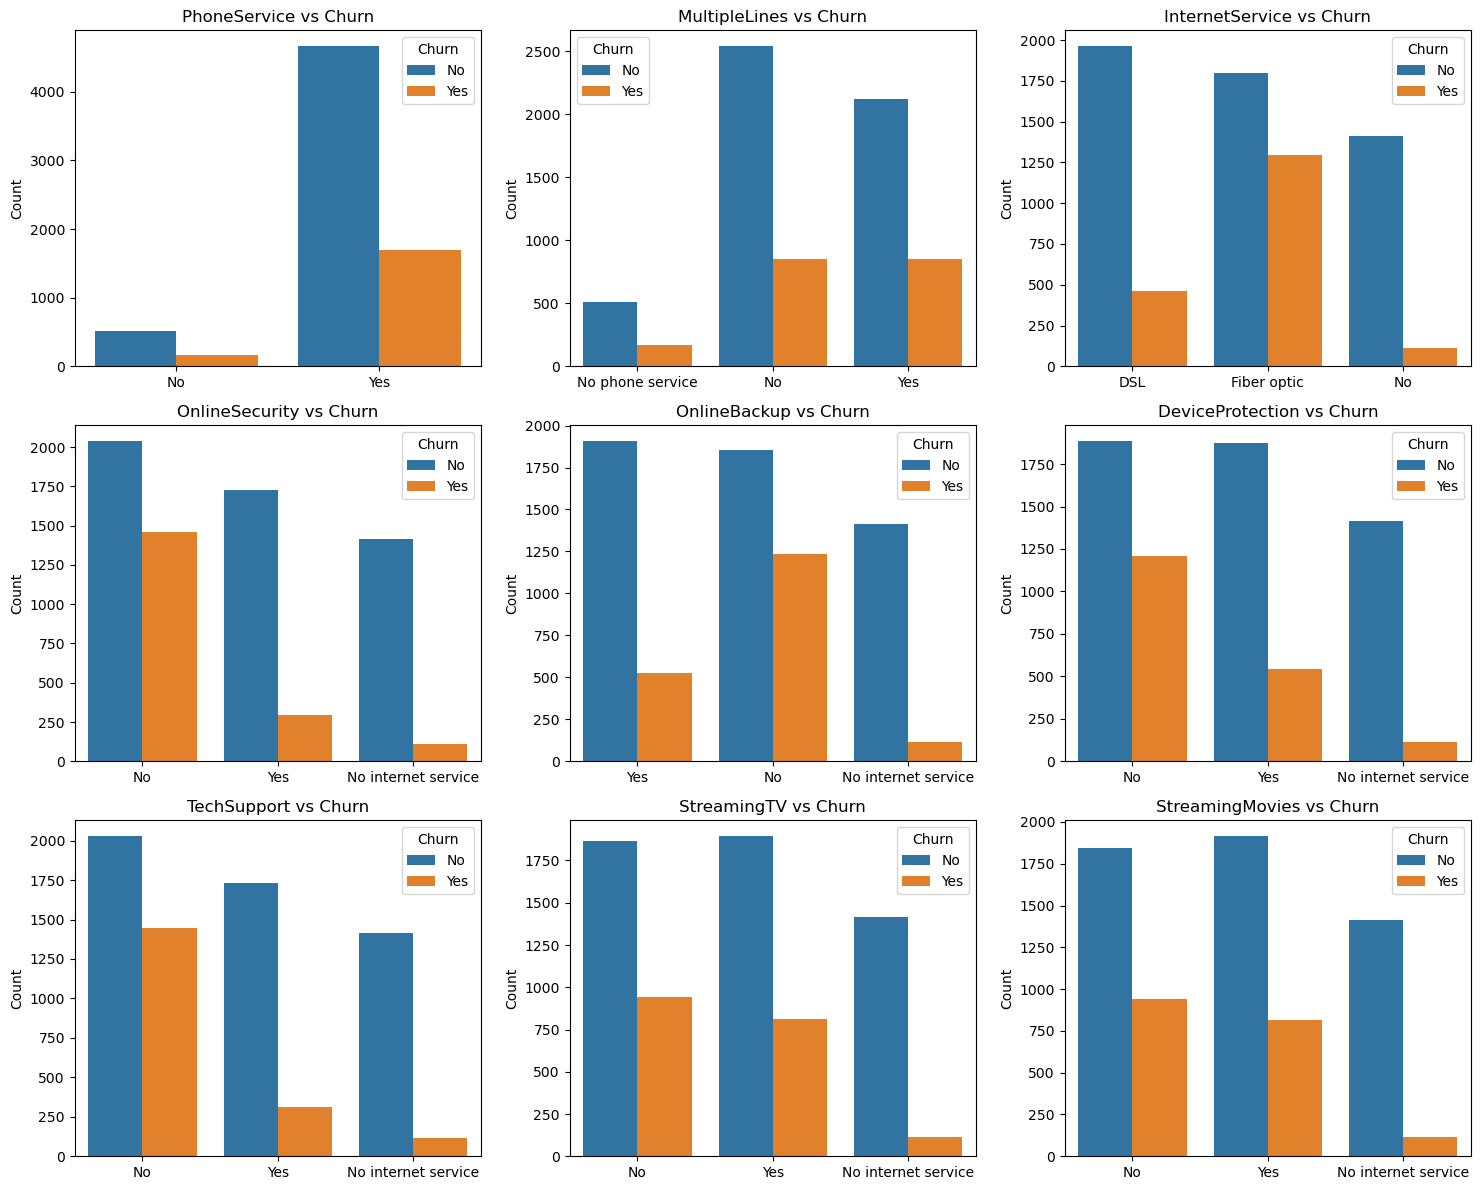

In [96]:
  cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the grid (3 rows × 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()  # make it 1D array for easy looping

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'{col} vs Churn')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove extra empty plots if any
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### --> Most customers with PhoneService, MultipleLines, and InternetService tend to stay, but fiber optic users have a noticeably higher churn rate.
### --> Services like OnlineSecurity, TechSupport, and DeviceProtection show strong retention — customers who have these are less likely to churn.
### --> Those lacking add-on services (like OnlineBackup or Streaming options) exhibit higher churn, indicating that bundled or supportive services improve loyalty.

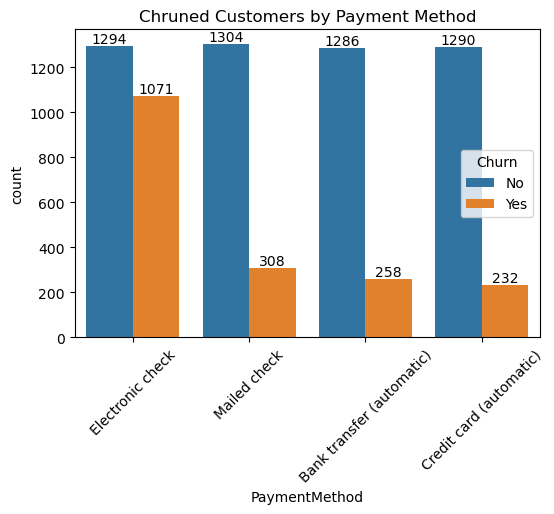

In [104]:
plt.figure(figsize = (6,4)) 
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = "Churn") 
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Chruned Customers by Payment Method') 
plt.xticks(rotation = 45)
plt.show()

### --> customers are likely to churn when they are using electronic check payment method